<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project -Programming for  Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  TOPIC: ANALYSIS ON GOOGLE PLAY STORE APP
</div>

STUDENT INFORMATION:
- 21127038 - Võ Phú Hãn
- 21127351 - Hồ Đinh Duy Lực


OVERVIEW OF THE TOPIC:
- Reason forchoosing topic:


DATASET INFORMATION:
- Source:
- License: 

# Data Exploration - Preprocessing


## 1. Import Library


In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):

## 2. Exploring data

Read raw data from file

In [3]:
apps_df = pd.read_csv("../Data/Raw/googleplaystore.csv")
reviews_df = pd.read_csv("../Data/Raw/googleplaystore_user_reviews.csv")

### 2.1. Exploring on `apps_df`

#### How many rows and how many columns?

In [4]:
# Shape of apps_df
apps_shape = apps_df.shape
print(f'Number of rows: {apps_shape[0]}')
print(f'Number of columns: {apps_shape[1]}')

Number of rows: 10840
Number of columns: 13


#### What is the meaning of each row?

In [5]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


Each row contains information of an application on Google Play Store.

#### Are there duplicated rows?

In [6]:
app = apps_df['App']
detectDupApps = app.duplicated(keep='first')
# detectDupSeries = apps_df.duplicated(keep='first')
num_duplicated_rows = detectDupApps.sum()
print(f'The data have {num_duplicated_rows} duplicated rows')

The data have 1181 duplicated rows


So we're going to drop duplicated rows.

In [7]:
# In 'apps_df'
apps_df.drop_duplicates(subset='App', keep='first', inplace=True)
# apps_df.drop_duplicates(keep='first', inplace=True)
apps_df.shape

#In 'review_df'

(9659, 13)

#### What is the meaning of each column?

**Apps dataset columns descriptions:**

This file contains all the details of the apps on Google Play. There are 13 features that describe a given app.

- **App**: Name of the app
- **Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
- **Rating**: The current average rating (out of 5) of the app on Google Play.
- **Reviews**: Number of user reviews given on the app.
- **Size**: Size of the app in MB (megabytes).
- **Installs**: Number of times the app was downloaded from Google Play
- **Type**: Whether the app is paid or free.
- **Price**: Price of the app in US$
- **Last Updated**: Date on which the app was last updated on Google Play
- **Content Rating**: Subject the app aim to.
- **Genres**: Type of the application.
- **Current Ver**: Newest version that has been released by the publisher.
- **Android Ver**: The cofiguration that devices need in order to work properly.rk properly.roperly.yd or fr Google Play

####  What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We observe that `Installs`, `Price`, `Size` should have *numeric* datatype and `Last Updated` should has *datetime* datatype.

First, we will remove non-digit charater in `Installs` column, then, convert them to numeric.

In [9]:
apps_df['Installs'] = apps_df['Installs'].str.replace(r'\D', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='raise')

In `Price` column, first, we'll find out what make them be non-numeric.

In [10]:
price_series = apps_df['Price']
strange_data = price_series[~price_series.str.isnumeric()]
strange_data

234       $4.99 
235       $4.99 
427       $3.99 
476       $3.99 
477       $6.99 
          ...   
10734     $0.99 
10759     $7.99 
10781    $16.99 
10784     $1.20 
10797     $1.04 
Name: Price, Length: 756, dtype: object

At first, we predict that the '$' at the head makes them being strings. Eliminating this character does not affecting our dataset, so we should remove them. However, to be more carefully, we would check whether there are any non-number characters in this column. 

In [11]:
strange_data[~strange_data.str.contains(r'\$')]

Series([], Name: Price, dtype: object)

Now, we see all problems that make the column "non-numeric". We'll handle them.

In [12]:
apps_df['Price'] = apps_df['Price'].str.replace(r'\$', '', regex=True)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='raise')

Now, we would convert `Last Updated` to *datetime*.

In [13]:
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], format="%d-%b-%y", errors='raise')

To pre-process `Size`, we would split the size number and their unit to new column. Then, we would scale them in to the same unit (M) because some apps have size value in 'k' instead of 'M'

In [14]:
def SizeUnit(str): # return the unit of size
    if str[-1] == 'M':
        return 'M'
    elif str[-1] == 'k':
        return 'k'
    elif str == 'Varies with device':
        return 'Varies with device'

# create new column to store size unit
apps_df['Size Unit'] = apps_df['Size'].apply(lambda x: SizeUnit(x))
# remove unit attached to size
apps_df['Size'] = apps_df['Size'].apply(lambda x: x[:-1])
# replace unclear size by np.nan
apps_df['Size'] = apps_df['Size'].replace('Varies with devic', np.nan)

# change all value to the same scale
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='raise')
apps_df['Size'] = np.where(apps_df['Size Unit'] == 'k', apps_df['Size']/1024, apps_df['Size'])

# drop 'Size Unit' because it is no longer neccessary
apps_df.drop(columns='Size Unit', inplace=True)

Double check on data type.

In [15]:
apps_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

Now, they seem appropriate for analysing!!!

#### With each numerical column, how are values distributed?

In [16]:
num_col_df = apps_df.select_dtypes(include='number')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, 'mean', 'min', lower_quartile, median, upper_quartile, 'max'])
num_col_info_df

,Rating,Reviews,Size,Installs,Price
missing_ratio,15.100000,0.000000e+00,12.700000,0.000000e+00,0.000000
mean,4.173243,2.165926e+05,20.394897,7.777507e+06,1.099299
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
lower_quartile,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
median,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
upper_quartile,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Installs'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

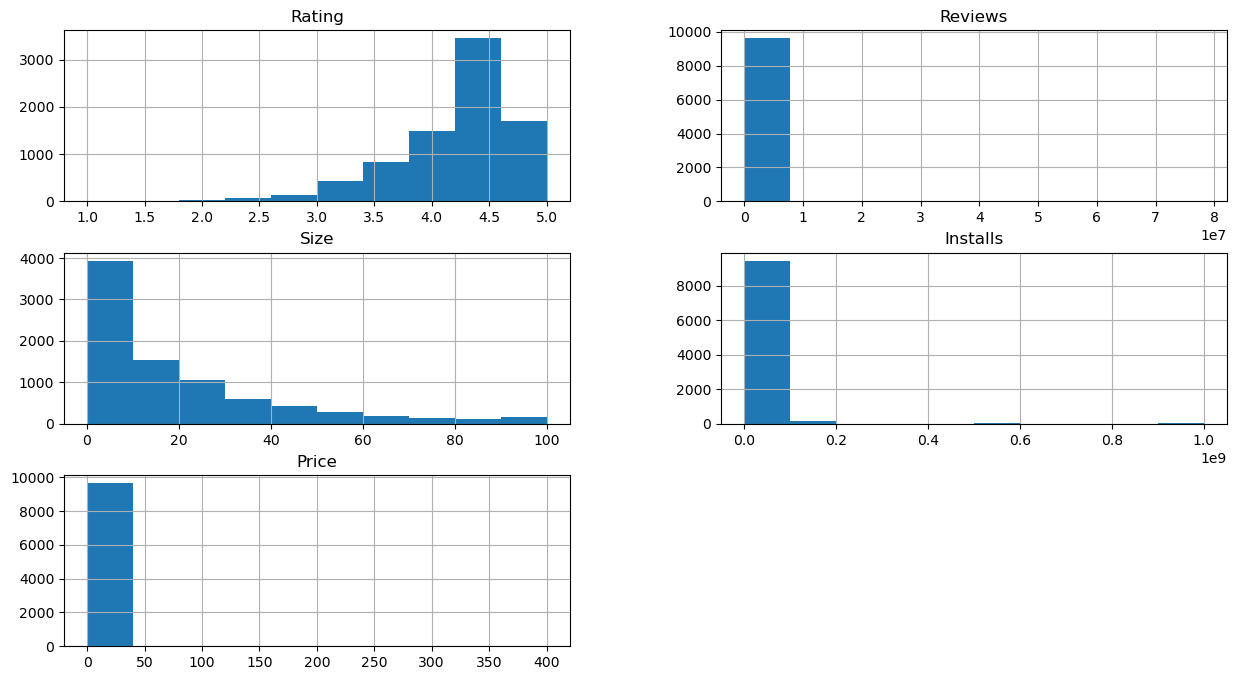

In [17]:
# visualize the distribution
num_col_df.hist(figsize=(15, 8))

The data have nothing abnormal. However, there are some missing values with small ratio - smaller than 20%, so we're going to fill them.
- For `Rating`, we would fill them with the mean of each `Category`, because the difference between *mean* and *median* is not significant.
- For `Size`, we would fill them with the median of each `Category`, because the *mean* is very different from the *median*.

In [18]:
apps_df['Rating'] = apps_df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))
apps_df['Size'] = apps_df.groupby('Category')['Size'].transform(lambda x: x.fillna(x.median()))

In [19]:
# double check on numeric columns
num_col_info_df = apps_df.select_dtypes(include='number')
num_col_info_df = num_col_info_df.agg([missing_ratio, 'mean', 'min', lower_quartile, median, upper_quartile, 'max'])
num_col_info_df

,Rating,Reviews,Size,Installs,Price
missing_ratio,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000
mean,4.17223,2.165926e+05,19.439002,7.777507e+06,1.099299
min,1.00000,0.000000e+00,0.008301,0.000000e+00,0.000000
lower_quartile,4.00000,2.500000e+01,5.000000,1.000000e+03,0.000000
median,4.20000,9.670000e+02,11.000000,1.000000e+05,0.000000
upper_quartile,4.50000,2.940100e+04,26.000000,1.000000e+06,0.000000
max,5.00000,7.815831e+07,100.000000,1.000000e+09,400.000000


#### With each categorical column, how are values distributed?

In [20]:
cat_col_df = apps_df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_counts(s):
    s = s.str.split(';')
    s = s.explode()
    return (s.value_counts()).to_dict()

cat_col_info_df = cat_col_df.agg([missing_ratio, num_values, value_counts])
cat_col_info_df

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.1,0.0
num_values,9659,33,2,6,53,2768,33
value_counts,{'Photo Editor & Candy Camera & Grid & ScrapBo...,"{'FAMILY': 1832, 'GAME': 959, 'TOOLS': 827, 'B...","{'Free': 8902, 'Paid': 756}","{'Everyone': 7903, 'Teen': 1036, 'Mature 17+':...","{'Tools': 827, 'Education': 678, 'Entertainmen...","{'Varies with device': 1055, '1': 831, '1.1': ...","{'4.1 and up': 2202, '4.0.3 and up': 1395, '4...."


The `Type` column has value *Free* and *Paid*, therefore, the type of an app is dependent on its price. Are there any app does not follow this contrain?

In [21]:
count_strange = apps_df[(apps_df['Type'] == 'Paid') & (apps_df['Price'] == 0)]['App'].count()
count_strange += apps_df[(apps_df['Type'] == 'Free') & (apps_df['Price'] != 0)]['App'].count()
print(f"There are {count_strange} abnormal apps when comparing 'Type' and 'Price'.")

There are 0 abnormal apps when comparing 'Type' and 'Price'.


In other columns, the data do not seem abnormal. However, we notice that: 
- `Category` and `Genres` seem to have the same meaning, so we would drop `Geners` column.
- `Current Ver` has 0.1% missing ratio. However, we can not really exploit so much information from this column, so we gonna drop it instead of filling them with some value.

In [22]:
apps_df.drop(columns=['Genres', 'Current Ver'], inplace=True)

In [23]:
# double check on category columns
cat_col_info_df = apps_df.select_dtypes(include='object')
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_counts])
cat_col_info_df

,App,Category,Type,Content Rating,Android Ver
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_values,9659,33,2,6,33
value_counts,{'Photo Editor & Candy Camera & Grid & ScrapBo...,"{'FAMILY': 1832, 'GAME': 959, 'TOOLS': 827, 'B...","{'Free': 8902, 'Paid': 756}","{'Everyone': 7903, 'Teen': 1036, 'Mature 17+':...","{'4.1 and up': 2202, '4.0.3 and up': 1395, '4...."


We have another data type `datetime` which we have not checked yet.

In [24]:
datetime_ratio = apps_df['Last Updated'].isna().mean() * 100
print(f"Missing ratio of 'Last Updated': {datetime_ratio}")

Missing ratio of 'Last Updated': 0.0


Now, we have finished pre-process the data!!!

### Save the cleaned data

In [25]:
print(f"Total number of features: {apps_df.shape[1]}")
apps_df.head()

Total number of features: 11


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,4.4 and up


In [26]:
apps_df.to_csv("../Data/Processed/cleaned_apps.csv", index=False)

### 2.2. Exploring on `reviews_df`

#### How many rows and how many columns?

In [27]:
# Shape of apps_df
reviews_shape = reviews_df.shape
print(f'Number of rows: {reviews_shape[0]}')
print(f'Number of columns: {reviews_shape[1]}')

Number of rows: 64295
Number of columns: 5


#### What is the meaning of each row?

In [28]:
reviews_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Each row contains the details of a review and its user's sentiment of an app on Google Play Store.

#### What is the meaning of each column?

In [29]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**Reviews dataset columns descriptions:**

This file contains all the details of reviews of apps on Google Play. There are 5 features that describe a given app.

- **App**: Name of the app
- **Translated_Review**: the review of user translated to English.
- **Sentiment**: the attitude of the review.
- **Sentiment_Polarity**: the sentiment polarity score.
- **Sentiment_Subjectivity**: the sentiment subjectivity score.

In this dataset, we can only use the `Sentiment` of each each review to evaluate user attitudes when using the app due to our limited knowledge in Natural Language Processing. Therefore, we're going to drop `Translated_Review`, `Sentiment_Polarity`, `Sentiment_Subjectivity` and only use the `App` name and its `Sentiment`.

In [30]:
reviews_df.drop(columns=['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

####  What is the current data type of each column? Are there columns having inappropriate data types?

In [31]:
reviews_df.dtypes

App          object
Sentiment    object
dtype: object

The data type seem normal.

#### How are values distributed?

In [32]:
cat_col_df = reviews_df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_counts(s):
    s = s.str.split(';')
    s = s.explode()
    return (s.value_counts()).to_dict()

cat_col_info_df = cat_col_df.agg([missing_ratio, num_values, value_counts])
cat_col_info_df

,App,Sentiment
missing_ratio,0.0,41.8
num_values,1074,3
value_counts,"{'Angry Birds Classic': 320, 'CBS Sports App -...","{'Positive': 23998, 'Negative': 8271, 'Neutral..."


Because, `none` value in `Sentiment` give us no information so we would drop all of the `none` values.

In [33]:
reviews_df.dropna(inplace=True)

Double check on the dataframe:

In [34]:
cat_col_df = reviews_df.select_dtypes(include='object')
cat_col_info_df = cat_col_df.agg([missing_ratio, num_values, value_counts])
cat_col_info_df

,App,Sentiment
missing_ratio,0.0,0.0
num_values,865,3
value_counts,"{'Bowmasters': 312, 'Helix Jump': 273, 'Angry ...","{'Positive': 23998, 'Negative': 8271, 'Neutral..."


Text(0.5, 1.0, 'Distribution of Sentiment')

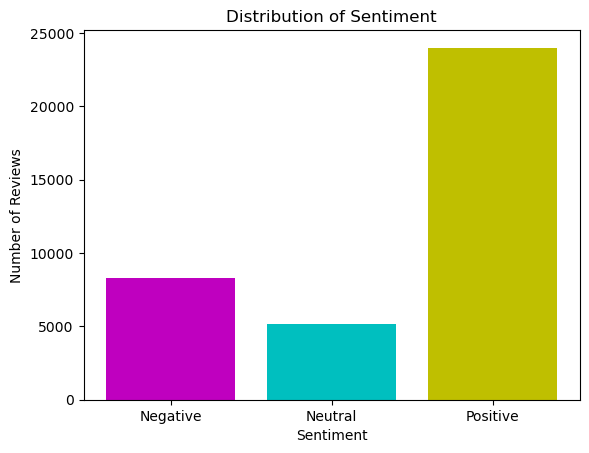

In [42]:
sentiment_df = reviews_df.groupby('Sentiment').count()
plt.bar(sentiment_df.index, sentiment_df['App'], color=['m', 'c', 'y'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment')

#### Save the cleaned data

In [44]:
reviews_df.to_csv("../Data/Processed/cleaned_reviews.csv", index=False)